In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px


In [2]:
df=pd.read_csv('McDonalds_Financial_Statements.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 21 non-null     int64  
 1   Market cap ($B)                      21 non-null     float64
 2   Revenue ($B)                         21 non-null     float64
 3   Earnings ($B)                        21 non-null     float64
 4   P/E ratio                            21 non-null     float64
 5   P/S ratio                            21 non-null     float64
 6   P/B ratio                            21 non-null     float64
 7   Operating Margin (%)                 21 non-null     float64
 8   EPS ($)                              21 non-null     float64
 9   Shares Outstanding ($B)              21 non-null     float64
 10  Cash on Hand ($B)                    21 non-null     float64
 11  Dividend Yield (%)                

In [4]:
df.head()

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
0,2022,193.01,23.18,7.82,31.3,8.33,-32.2,33.76,8.42,0.73,2.58,2.15,5.66,-6.01,50.43,48.03,56.43
1,2021,200.31,23.22,9.12,26.5,8.63,-43.5,39.31,10.11,0.74,4.70,1.96,5.25,-4.61,53.60,48.64,58.20
2,2020,159.88,19.20,6.14,33.8,8.32,-20.4,31.97,6.35,0.74,3.44,2.35,5.04,-7.83,52.62,48.51,60.45
3,2019,147.47,21.28,8.01,24.8,6.93,-18.0,38.04,7.98,0.74,0.89,2.39,4.73,-8.22,47.51,46.87,55.72
4,2018,136.21,21.02,7.81,23.2,6.48,-21.8,37.17,7.65,0.76,0.86,2.36,4.19,-6.26,32.81,31.07,39.06


In [5]:
df.describe()

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2012.000000,96.824286,22.706190,6.214762,21.661905,4.234762,-7.100000,26.889048,4.852857,0.994762,2.387619,2.487143,2.754286,7.217143,35.016190,21.286190,27.793810
std,6.204837,50.396346,3.398316,2.226166,5.541974,2.266896,19.356029,8.355580,2.507501,0.200714,1.639948,0.575518,1.679874,9.489797,8.715523,14.922204,16.800857
min,2002.000000,20.390000,15.400000,1.660000,15.000000,1.320000,-45.900000,10.790000,0.700000,0.730000,0.330000,1.460000,0.240000,-8.220000,23.970000,8.430000,13.540000
25%,2007.000000,67.220000,20.810000,3.880000,16.500000,2.950000,-20.400000,19.300000,2.880000,0.790000,1.370000,2.150000,1.500000,-3.270000,29.390000,10.140000,14.840000
50%,2012.000000,90.220000,22.820000,6.860000,21.400000,3.360000,2.870000,28.520000,4.880000,1.000000,2.130000,2.390000,2.870000,12.850000,32.810000,13.630000,20.090000
75%,2017.000000,136.210000,24.620000,8.010000,24.800000,6.010000,5.530000,31.970000,6.350000,1.180000,2.580000,2.940000,3.830000,14.630000,36.620000,29.530000,37.070000
max,2022.000000,200.310000,28.100000,9.120000,33.800000,8.630000,15.100000,39.310000,10.110000,1.270000,7.680000,3.500000,5.660000,16.000000,53.600000,48.640000,60.450000


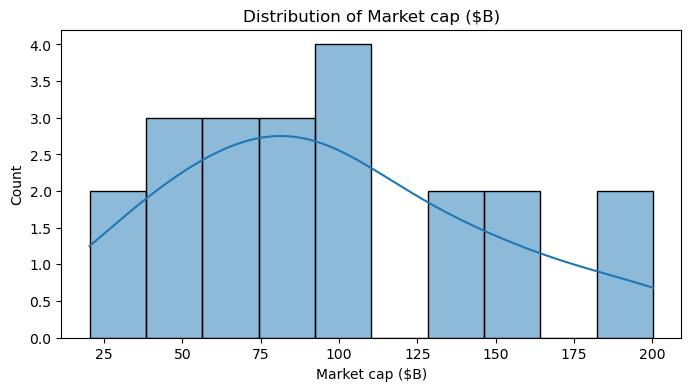

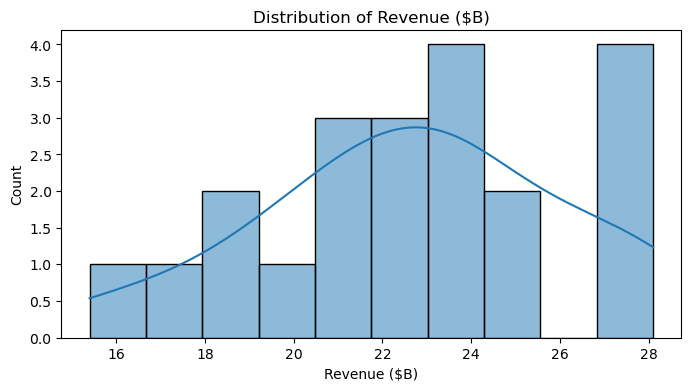

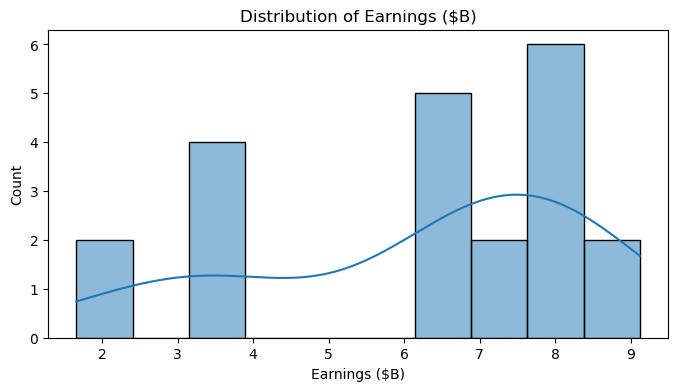

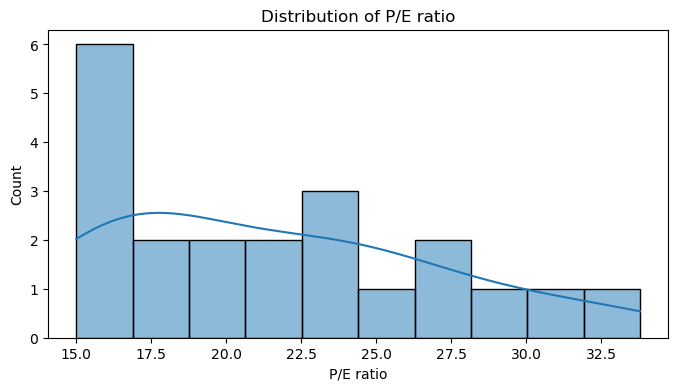

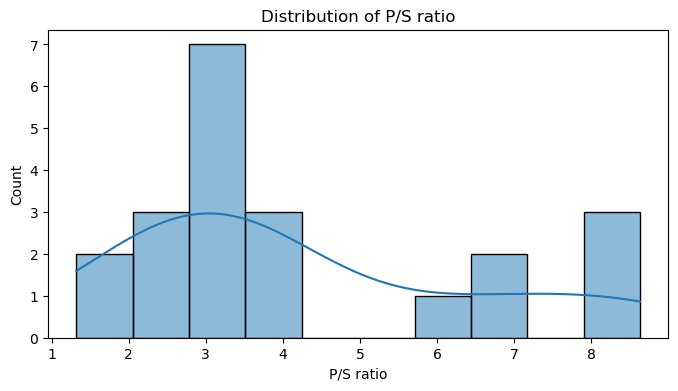

In [7]:
columns_to_plot = ['Market cap ($B)', 'Revenue ($B)', 'Earnings ($B)', 'P/E ratio', 'P/S ratio']

for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Distribution of {col}')
    plt.show()

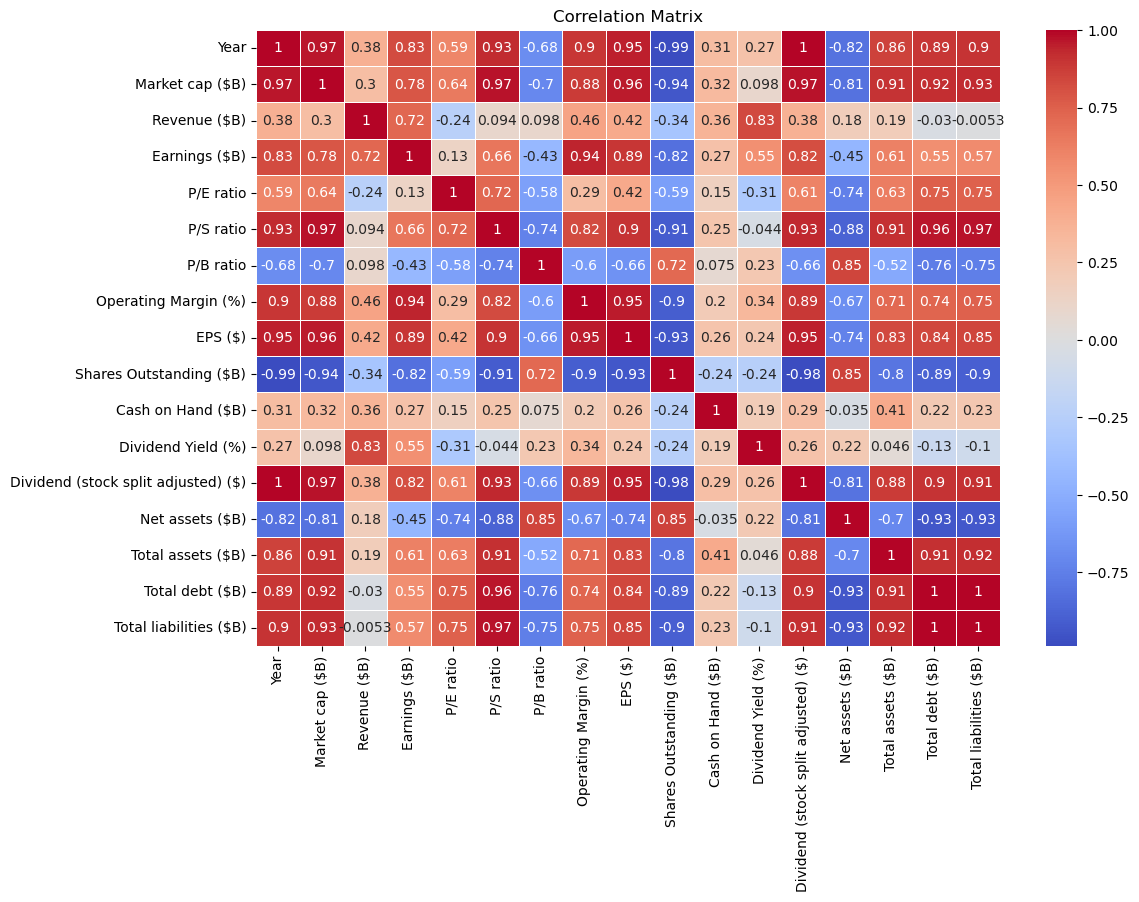

In [8]:
corr_matrix = df.corr()

# Visualización con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
financial_metrics = ['Market cap ($B)', 'Revenue ($B)', 'Earnings ($B)', 'P/E ratio', 'P/S ratio']

for metric in financial_metrics:
    mean_val = df[metric].mean()
    median_val = df[metric].median()
    std_dev = df[metric].std()
    
    print(f"{metric}: Mean={mean_val}, Median={median_val}, Std Dev={std_dev}")

Market cap ($B): Mean=96.82428571428571, Median=90.22, Std Dev=50.39634635282884
Revenue ($B): Mean=22.706190476190475, Median=22.82, Std Dev=3.3983164599408284
Earnings ($B): Mean=6.214761904761906, Median=6.86, Std Dev=2.2261662540062432
P/E ratio: Mean=21.66190476190476, Median=21.4, Std Dev=5.541974033724463
P/S ratio: Mean=4.234761904761904, Median=3.36, Std Dev=2.266895716718392


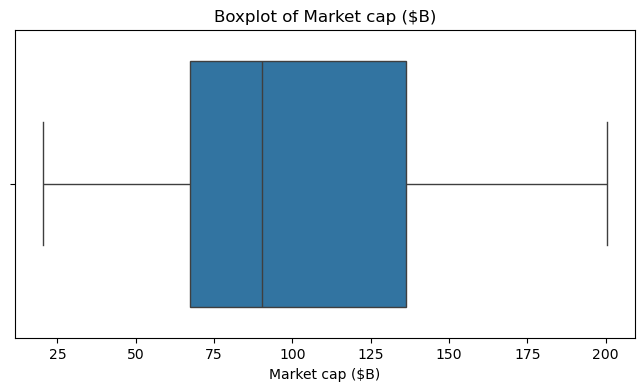

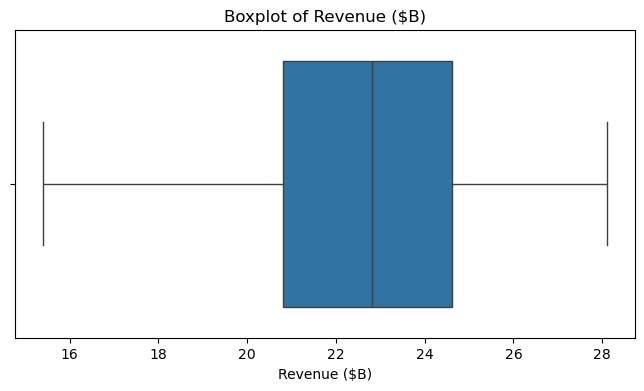

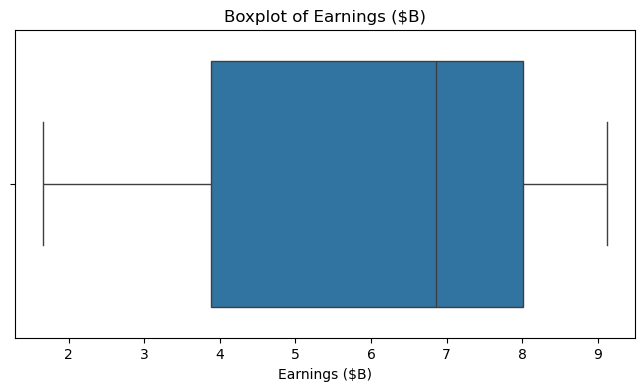

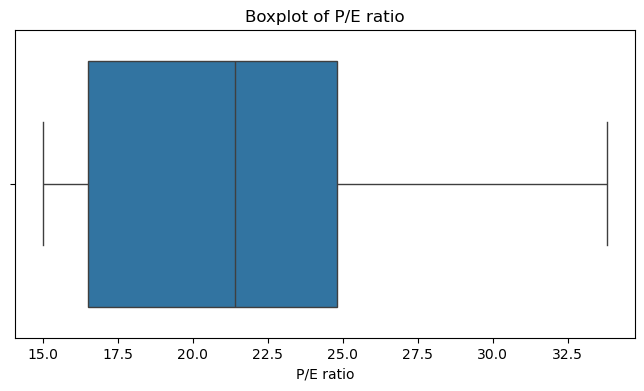

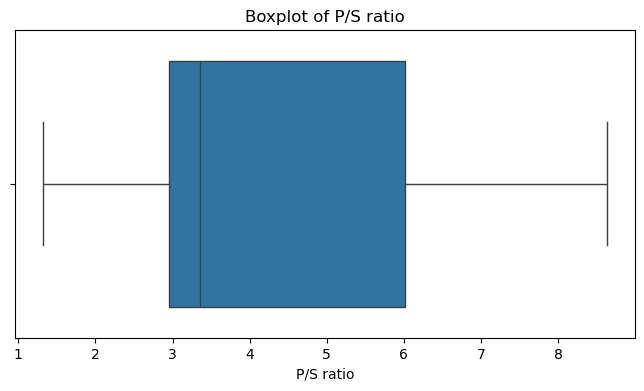

In [10]:
# Boxplots para identificar outliers en variables clave
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

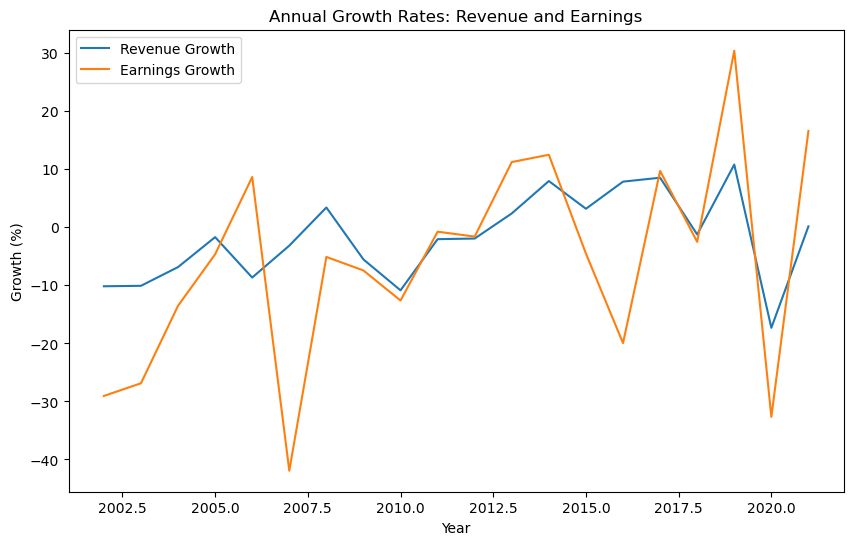

In [11]:
df['Revenue Growth (%)'] = df['Revenue ($B)'].pct_change() * 100
df['Earnings Growth (%)'] = df['Earnings ($B)'].pct_change() * 100

# Visualización del crecimiento a lo largo de los años
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Revenue Growth (%)'], label='Revenue Growth')
plt.plot(df['Year'], df['Earnings Growth (%)'], label='Earnings Growth')
plt.title('Annual Growth Rates: Revenue and Earnings')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.legend()
plt.show()

In [13]:
# Seleccionar características y la variable objetivo
X = df[['Market cap ($B)', 'P/E ratio', 'P/S ratio', 'Operating Margin (%)']]
y = df['Revenue ($B)']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 18.221866009985582
R-squared: -2.582873888279574


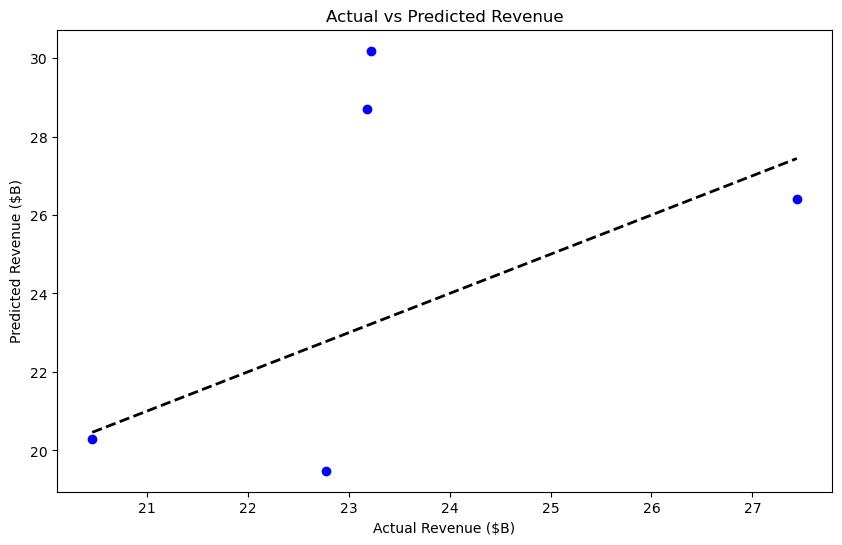

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Revenue ($B)')
plt.ylabel('Predicted Revenue ($B)')
plt.title('Actual vs Predicted Revenue')
plt.show()

In [16]:


# Crear y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Random Forest - Mean Squared Error (MSE): 5.471080424000009
Random Forest - R-squared: -0.07575103346085266


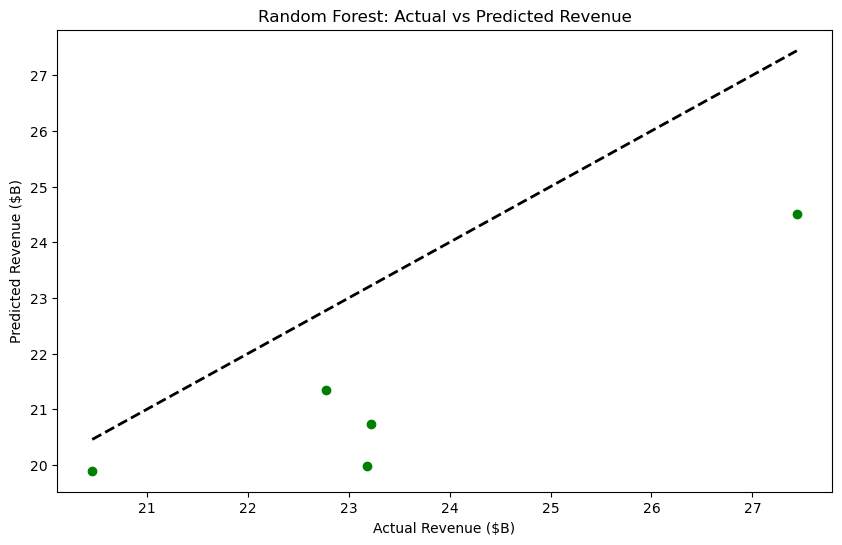

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Revenue ($B)')
plt.ylabel('Predicted Revenue ($B)')
plt.title('Random Forest: Actual vs Predicted Revenue')
plt.show()

In [19]:

# Gráfico interactivo de ingresos y ganancias
fig = px.line(df, x='Year', y=['Revenue ($B)', 'Earnings ($B)'],
              title='Revenue and Earnings Over the Years')
fig.show()

In [20]:
fig = px.bar(df, x='Year', y=['P/E ratio', 'P/S ratio', 'P/B ratio'],
             barmode='group', title='Financial Ratios Over the Years')
fig.show()